<데이터 불러오기>

numpy와 pandas를 import 하고, pd.read_csv를 이용해서 불러옴

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

데이터가 제대로 불러와졌는지 확인 ---> train.head() 실행

별다른 명령이 없으면 상위 5개의 데이터를 가져옴 / train.head(10) -> 상위 10개

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<데이터 분석>

Survied : 0 = No, 1 = Yes
SipSp : 배우자나 형재 자매 명 수의 총합
Pacch : 부모 자식 명 수의 총합

In [4]:
print('test data shape: ', train.shape)
print('test data shape: ', test.shape)
print('----------[train infomation]----------')
print(train.info())
print('----------[test infomation]----------')
print(test.info())

test data shape:  (891, 12)
test data shape:  (418, 11)
----------[train infomation]----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------[test infomation]----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 

shape와 info 기능은 데이터 확인 및 개요 확인에 기본이 됨

데이터 값의 분포를 보기 위해 라이브러리 사용

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

< Pie chart for Categorical Feature >

sex, pclass, embarked의 Categorical Feature의 분포를 보기 위해 Pie chart를 만드는 함수 정의

In [6]:
def pie_chart(feature) :
    feature_ratio = train[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    
    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + '\'s ratio in total')
    plt.show()
    
    for i, index in enumerate(feature_index) :
        plt.subplot(1, feature_size + 1, i+1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survived', 'Dead'], autopct='%1.1f%%')
        plt.title(str(index) + '\'s ratio')
    
    plt.show()

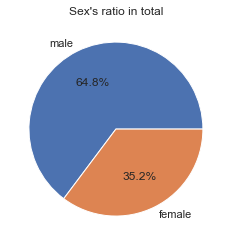

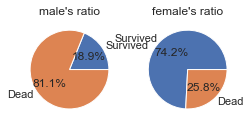

In [7]:
pie_chart('Sex')

성별에 따른 생존률 pie chart

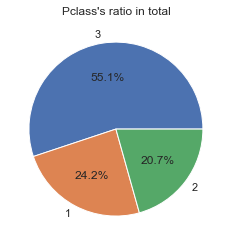

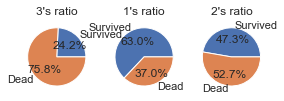

In [8]:
pie_chart('Pclass')

티켓클래스에 따른 생존률 pie chart

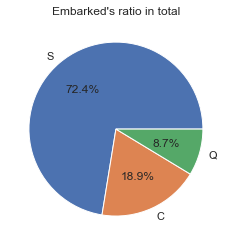

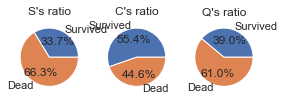

In [9]:
pie_chart('Embarked')

탑승항구에 따른 생존률 pie chart

< Bar chaart for Categorical feature >

SipSp, Parch에 대해 Bar chart를 정의해서 데이터 시각화하기

In [10]:
def bar_chart(feature): 
    survived = train[train['Survived']==1][feature].value_counts() 
    dead = train[train['Survived']==0][feature].value_counts() 
    df = pd.DataFrame([survived,dead]) 
    df.index = ['Survived','Dead'] 
    df.plot(kind='bar',stacked=True, figsize=(10,5))

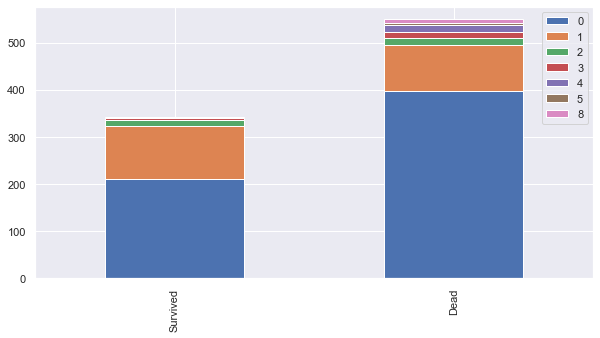

In [11]:
bar_chart("SibSp")

형제, 자매, 배우자와 함께 탑승한 승객들의 생존률 bar chart

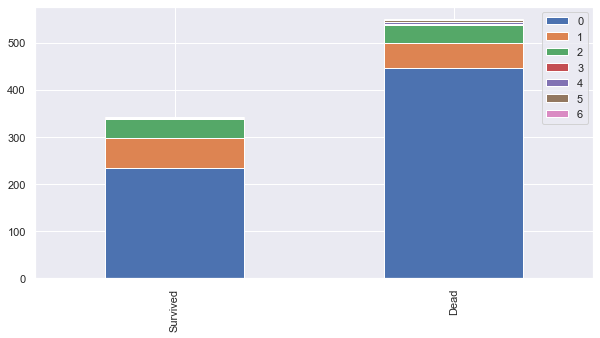

In [12]:
bar_chart("Parch")

부모, 자녀와 함께 탑승한 승객들의 생존률 bar chart

---- 데이터 특성들

성별이 여성일수록,

Pclass가 높을수록,

Cherbourg 선착장에서 배를 탔다면,

형제, 자매, 배우자, 부모, 자녀와 함께 배를 탔다면,

생존 확률이 더 높았다는 것을 확인 가능

하지만 하나의 특성과 생존 비율만을 생각하기에는 무리가 있음 --> 1차원적

< 데이터 전처리 및 특성 추출 >

데이터 전처리는 train과 test 데이터를 같은 방법으로 처리하기 때문에 두 개의 데이터를 먼저 합침

In [13]:
train_and_test = [train, test]

< Name Feature >

데이터 내 이름에는 Miss, Mr 등의 수식어가 붙어서 이것들으르 따로 추출하여 title에 넣어줌

In [14]:
for dataset in train_and_test :
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


' ([A-Za-z]+)\.' : 공백으로 시작하고, .으로 끝나는 문자열 추출

추출한 Title을 가진 사람이 몇 명 존재하는지 성별과 함께 표현

In [15]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


흔하지 않은 Title은 Other로 대체하고, 중복되는 표현 통일

In [16]:
for dataset in train_and_test :
    dataset['Title']=dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady',
                                              'Major', 'Rev', 'Sir'], 'Other')
    dataset['Title']=dataset['Title'].replace('Mile', 'Miss')
    dataset['Title']=dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title']=dataset['Title'].replace('Ms', 'Miss')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.699454
2,Mlle,1.000000
3,Mr,0.156673
4,Mrs,0.793651
5,Other,0.347826


title 데이터를 학습할 수 있도록 String Date Type으로 변형

In [17]:
for dataset in train_and_test :
    dataset['Title']=dataset['Title'].astype(str)

< Sex Feature >

이미 male과 female로 나눠져 있으므로 String Data로 변형해주면 됨

In [18]:
for dataset in train_and_test :
    dataset['Sex']=dataset['Sex'].astype(str)

< Embarked Feature >

train 데이터에서 Embarked Feature에는 NaN값이 존재

In [19]:
train.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

dropna=False : NaN 값을 포함한 갯수의 총합을 세줌

S가 대부분이고, 빠져있는 두개의 데이터도 거기에 속할 확률이 크기 때문에 S로 넣어주고 String Data로 변형

In [20]:
for dataseet in train_and_test :
    dataset['Embarked']=dataset['Embarked'].fillna('S')
    dataset['Embarked']=dataset['Embarked'].astype(str)

< Age Feature >

Age Feature에도 NaN값은 존재하는데, 일단 빠진 값에는 나머지 모든 승객 나이의 평균을 넣어줌

연속적인 numeric data를 처리하는 방법에도 여러가지가 있는데, 이번에는 Binning을 사용할 것

Binnig이란 여러 종류의 데이터에 대해 범위를 지정해주거나 카테고리를 통해 이전보다 작은 수의 그룹으로 만드는 기법

이를 통해서 단일성 분포의 왜곡을 막을 수 있지만, 이산화를 통한 데이터의 손실이라는 단점도 존재한다.

이번에는 pd.cut()을 이용해 같은 길이의 구간을 가지는 다섯 개의 그룹을 만든다

In [21]:
for dataset in train_and_test :
    dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
    dataset['Age']=dataset['Age'].astype(int)
    train['AgeBand']=pd.cut(train['Age'], 5)

print(train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


Age에 들어있는 값을 위에 구한 구간에 속하도록 바꿔줌

In [22]:
for dataset in train_and_test :
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0 
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1 
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2 
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3 
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 
    dataset['Age'] = dataset['Age'].map( { 0: 'Child', 1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)

< Fare Feature > 운임 비용

Fare Feature에도 NaN 값이 하나 존재하는데,

Pclass와 Fare가 어느 정도 연관성이 있는 것 같아 Fare 데이터가 빠진 값의 Pclass를 가진 사람들의 평균 Fare를 넣어줌

In [23]:
print(train[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean())
print("")
print(test[test["Fare"].isnull()]["Pclass"])

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550

152    3
Name: Pclass, dtype: int64


누락된 Pclass는 3

train 데이터에서 Pclass가 3인 사람들의 평균 Fare가 13.675550이므로 이 값을 넣어줌

In [24]:
for dataset in train_and_test :
    dataset['Fare']=dataset['Fare'].fillna(13.675)

아까 Age에서도 그랬듯이, Fare에도 Binning을 한다. 하지만 위에서와는 달리 Numeric한 값으로 남겨둔다.

In [25]:
for dataset in train_and_test:
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare']   = 3
    dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] = 4
    dataset['Fare'] = dataset['Fare'].astype(int)

< SibSp & Parch Feature (Family) >

형제, 자매, 배우자, 부모님, 자녀의 수가 많을수록 생존한 경우가 많았는데,

두개의 Feature 합쳐서 Family라는 Feature로 만듦

In [26]:
for dataset in train_and_test :
    dataset["Family"]=dataset["Parch"]+dataset["SibSp"]
    dataset["Family"]=dataset['Family'].astype(int)

계획한 Feature Data의 전처리가 끝나, 학습 때 제외할 Feature들 Drop

In [27]:
features_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId', 'AgeBand'], axis=1)

print(train.head())
print(test.head())

   Survived  Pclass     Sex     Age  Fare Embarked Title  Family
0         0       3    male   Young     0        S    Mr       1
1         1       1  female  Middle     4        C   Mrs       1
2         1       3  female   Young     1        S  Miss       0
3         1       1  female  Middle     4        S   Mrs       1
4         0       3    male  Middle     1        S    Mr       0
   PassengerId  Pclass     Sex     Age  Fare Embarked Title  Family
0          892       3    male  Middle     0        Q    Mr       0
1          893       3  female  Middle     0        S   Mrs       1
2          894       2    male   Prime     1        Q    Mr       0
3          895       3    male   Young     1        S    Mr       0
4          896       3  female   Young     2        S   Mrs       2


가공된 train, test 데이터

Categorical Feature에 대해 one-hot encoding과 train data와 label을 분리시키는 작업 -> 예측 모델 학습 준비 끝

In [28]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train_label = train['Survived']
train_data = train.drop('Survived', axis=1)
test_data = test.drop('PassengerId', axis=1).copy()

<모델 설계 및 학습>

사용할 예측 모델 5가지

1. Logistic Regression
2. Support Vector Machine (SVM)
3. k-Nearest Neighbor (kNN)
4. Random Forest
5. Naive Bayes

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

데이터 정렬되어 있어 학습에 방해가 생길지 모르니 데이터를 섞어줌

In [30]:
train_data, train_label = shuffle(train_data, train_label, random_state=5)

모델 학습과 평가에 대한 pipeline을 만듦

scikit-learn에서 제공하는 fit()과 predict()를 사용하면 간단하게 학습과 예측 가능

In [31]:
def train_and_test(model) :
    model.fit(train_data, train_label)
    prediction = model.predict(test_data)
    accuracy = round(model.score(train_data, train_label)*100, 2)
    print("Accuracy: ", accuracy, "%")
    return prediction

함수에 다섯가지 모델을 넣어주면 학습과 평가가 완료됨

In [32]:
# Logistic Regression 
log_pred = train_and_test(LogisticRegression()) 
# SVM 
svm_pred = train_and_test(SVC()) 
#kNN 
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4)) 
# Random Forest 
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100)) 
# Navie Bayes 
nb_pred = train_and_test(GaussianNB())

c:\users\wjdgk\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Title_Dona
Feature names seen at fit time, yet now missing:
- Title_Mlle

  warnings.warn(message, FutureWarning)
c:\users\wjdgk\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Title_Dona
Feature names seen at fit time, yet now missing:
- Title_Mlle

  warnings.warn(message, FutureWarning)
c:\users\wjdgk\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Title_Dona
Feature names seen at fit time, yet now missing:
- Title_Mlle

  warnings.

Accuracy:  82.72 %
Accuracy:  83.5 %
Accuracy:  84.85 %
Accuracy:  88.55 %
Accuracy:  81.59 %


c:\users\wjdgk\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Title_Dona
Feature names seen at fit time, yet now missing:
- Title_Mlle

  warnings.warn(message, FutureWarning)
c:\users\wjdgk\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Title_Dona
Feature names seen at fit time, yet now missing:
- Title_Mlle

  warnings.warn(message, FutureWarning)


4번째 모델의 정확도가 가장 높아 이 모델을 이용해서 submission

In [34]:
submission = pd.DataFrame({ 
    "PassengerId": test["PassengerId"], 
    "Survived": rf_pred 
}) 
submission.to_csv('submission_rf.csv', index=False)